In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("Range.csv")

In [3]:
data

,Unnamed: 0,Unnamed: 0.1,date,1. open,2. high,3. low,4. close,5. volume,y,x,Label,Grp
0,8,8,2020-05-26,821.90,842.70,821.00,825.55,4335209.0,3.65,21.70,1.0,0
1,7,7,2020-05-27,831.95,857.20,827.00,850.85,5159287.0,18.90,30.20,0.0,0
2,6,6,2020-05-28,855.00,912.00,855.00,905.50,11481079.0,50.50,57.00,0.0,0
3,5,5,2020-05-29,893.20,937.50,891.00,932.25,10166556.0,39.05,46.50,0.0,0
4,4,4,2020-06-01,944.65,974.15,924.00,928.15,7617144.0,16.50,50.15,1.0,0
5,3,3,2020-06-02,935.00,953.00,913.05,945.45,7325471.0,10.45,39.95,1.0,0


In [4]:
data = data.drop(columns=["Unnamed: 0","Unnamed: 0.1","y","x","1. open","2. high"])


In [5]:

data.reset_index(inplace=True)

In [6]:
data

,index,date,3. low,4. close,5. volume,Label,Grp
0,0,2020-05-26,821.00,825.55,4335209.0,1.0,0
1,1,2020-05-27,827.00,850.85,5159287.0,0.0,0
2,2,2020-05-28,855.00,905.50,11481079.0,0.0,0
3,3,2020-05-29,891.00,932.25,10166556.0,0.0,0
4,4,2020-06-01,924.00,928.15,7617144.0,1.0,0
5,5,2020-06-02,913.05,945.45,7325471.0,1.0,0


In [7]:
data.drop(columns=["index"],inplace=True)

In [8]:
size = len(data)
l = []
i=0
l.append(0)
l.append(size)

In [9]:
l

[0, 6]

Slope 24.51857142857141


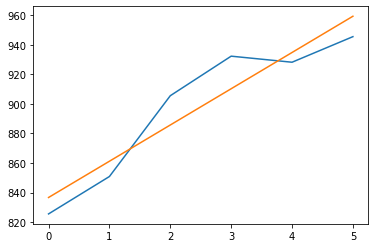

In [10]:
import time

trends = []

for x in l:
    selected = data.loc[(data.index >= x) & (data.index <x+size),'4. close']
    coefficients, residuals, _, _, _ = np.polyfit(range(len(selected.index)),selected,1,full=True)
    mse = residuals[0]/(len(selected.index))
    nrmse = np.sqrt(mse)/(selected.max() - selected.min())
    print('Slope ' + str(coefficients[0]))
    if(coefficients[0]>0):
        trends.append("Up")
    else:
        trends.append("Down")
    plt.plot(selected)
    plt.plot([coefficients[0]*x + coefficients[1] for x in range(len(selected))])
    plt.show()
    time.sleep(2)
    break
    

In [11]:
trends

['Up']

In [12]:
for i in trends:
    text = "\n\n\n\nTREND FOR REGION\nThe overall trend is : " + i



In [13]:
f=open("Report.txt", "a+")
f.write(text)


46

In [14]:
f.close()